# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-08-06 20:00:39.176324


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/5/20


,8/5/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,4823890,158854,3.29
Brazil,2859073,97256,3.40
Mexico,456100,49698,10.90
United Kingdom,308832,46449,15.04
India,1964536,40699,2.07
Italy,248803,35181,14.14
France,228576,30297,13.25


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 8/5/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
34078,US,4713540,2020-08-03,156104.0,539.0,45368.0,60457.571429
34077,US,4668172,2020-08-02,155565.0,406.0,47580.0,62035.571429
34076,US,4620592,2020-08-01,155159.0,1111.0,58485.0,63088.857143
34075,US,4562107,2020-07-31,154048.0,1246.0,67092.0,64225.142857
34074,US,4495015,2020-07-30,152802.0,1216.0,68033.0,65171.285714
34073,US,4426982,2020-07-29,151586.0,1436.0,70776.0,65265.857143
34072,US,4356206,2020-07-28,150150.0,1368.0,65869.0,65285.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 8/5/20


,8/5/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,418225,32754.0,7.83
New Jersey,183327,15842.0,8.64
California,530606,9808.0,1.85
Massachusetts,119643,8659.0,7.24
Texas,476999,8310.0,1.74
Illinois,187752,7770.0,4.14
Florida,502739,7627.0,1.52


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 8/5/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1179,California,516851,2020-08-03,9441.0,45.0,4676.0,8390.000000
1178,California,512175,2020-08-02,9396.0,51.0,5562.0,8555.285714
1177,California,506613,2020-08-01,9345.0,131.0,6057.0,8594.428571
1176,California,500556,2020-07-31,9214.0,188.0,7622.0,8624.428571
1175,California,492934,2020-07-30,9026.0,118.0,8021.0,8880.142857
1174,California,484913,2020-07-29,8908.0,229.0,14151.0,9089.571429
1173,California,470762,2020-07-28,8679.0,185.0,12641.0,8779.571429


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 8/5/20


,8/5/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,198165,4827.0,2.44
Riverside,38487,738.0,1.92
Orange,38131,665.0,1.74
San Diego,30516,568.0,1.86
San Bernardino,34237,487.0,1.42
Imperial,9513,232.0,2.44
Alameda,12136,193.0,1.59


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 8/5/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
3740,Los Angeles,193877,2020-08-03,4702.0,9.0,1700.0,2549.857143
3739,Los Angeles,192177,2020-08-02,4693.0,24.0,1320.0,2594.285714
3738,Los Angeles,190857,2020-08-01,4669.0,45.0,2316.0,2647.428571
3737,Los Angeles,188541,2020-07-31,4624.0,65.0,2505.0,2800.857143
3736,Los Angeles,186036,2020-07-30,4559.0,41.0,2580.0,2738.285714
3735,Los Angeles,183456,2020-07-29,4518.0,92.0,4814.0,2617.428571
3734,Los Angeles,178642,2020-07-28,4426.0,51.0,2614.0,2373.857143
3733,Los Angeles,176028,2020-07-27,4375.0,15.0,2011.0,2426.142857
3732,Los Angeles,174017,2020-07-26,4360.0,9.0,1692.0,2585.714286
3731,Los Angeles,172325,2020-07-25,4351.0,51.0,3390.0,2739.000000



7 day new US cases as of 8/5/20


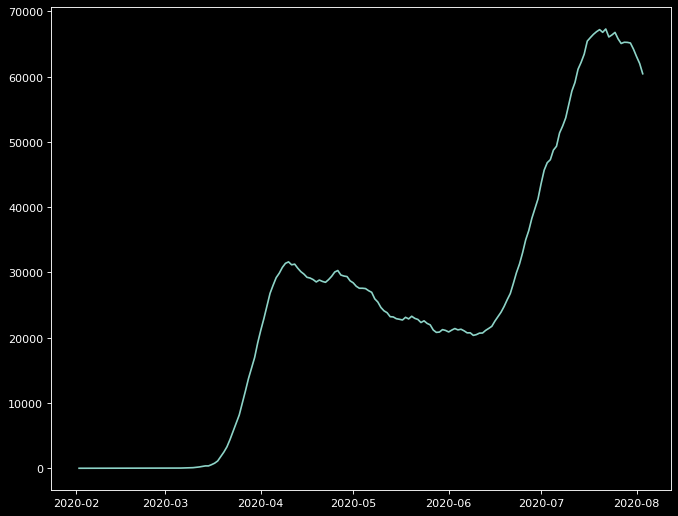

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 8/5/20


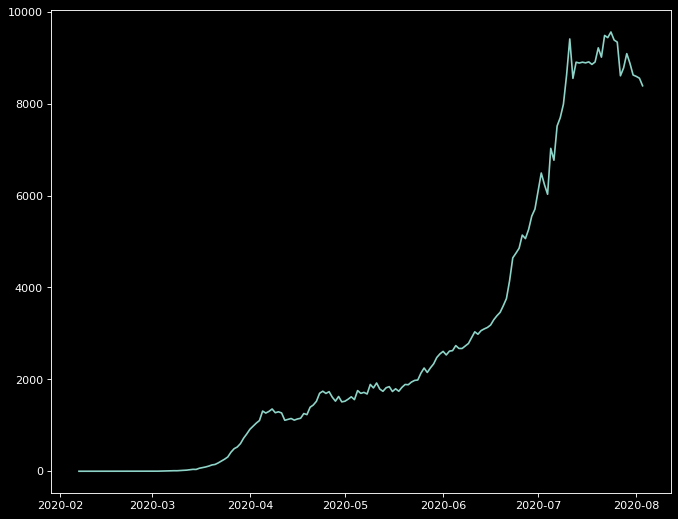

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 8/5/20


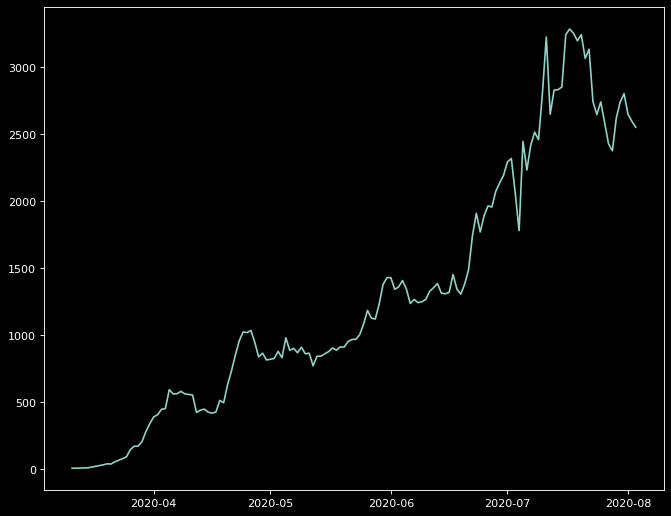

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()